In [1]:
import pandas as pd
import numpy as np
from math import log2

In [187]:
dataSet=pd.read_excel("/Users/karanbudhaair/Downloads/Home_Loan.xlsx", header=None)   
dataSet=dataSet[6:].reset_index(drop=True)

In [232]:
dataSet.columns

Index(['Borrower ID Number', 'Wide Area Location Code',
       '% Minority in Local Area', 'Median Family Income in Local Area',
       'Borrower Annual Income', 'Borrower Income Ratio',
       'First Time Buyer? (1=Yes, 2=No)', 'Age of Borrower',
       'Borrower Debt to Income Ratio', 'Appraised Value of Home',
       'Amount Borrowed', 'LTV Ratio', 'Length of Mortgage in Months',
       'Mortgage Interest Rate'],
      dtype='object', name=0)

In [233]:
dataSet.isna().sum(axis=0)


0
Borrower ID Number                    0
Wide Area Location Code               0
% Minority in Local Area              0
Median Family Income in Local Area    0
Borrower Annual Income                0
Borrower Income Ratio                 0
First Time Buyer? (1=Yes, 2=No)       0
Age of Borrower                       0
Borrower Debt to Income Ratio         0
Appraised Value of Home               0
Amount Borrowed                       0
LTV Ratio                             0
Length of Mortgage in Months          0
Mortgage Interest Rate                0
dtype: int64

## Statistical Summary

In [235]:
newDataSet.describe()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,250.500000,25.466000,28.318040,85300.200000,1.276260e+05,1.527757,1.888000,30.296000,4.347600e+05,286080.000000,70.694920,322.920000,3.235140
std,144.481833,16.552366,23.670543,15779.259489,1.051774e+05,1.368885,0.315682,12.072775,2.533407e+05,139004.597609,16.774328,70.249153,0.551974
min,1.000000,1.000000,1.490000,52300.000000,1.800000e+04,0.211300,1.000000,10.000000,3.500000e+04,25000.000000,12.060000,120.000000,1.870000
25%,125.750000,8.000000,10.472500,74875.000000,6.975000e+04,0.835100,2.000000,20.000000,2.650000e+05,185000.000000,60.000000,360.000000,2.870000
50%,250.500000,25.000000,19.655000,83300.000000,1.055000e+05,1.227650,2.000000,30.000000,3.600000e+05,265000.000000,74.295000,360.000000,3.120000
75%,375.250000,39.250000,39.592500,95450.000000,1.552500e+05,1.882550,2.000000,41.000000,5.550000e+05,375000.000000,80.000000,360.000000,3.500000
max,500.000000,55.000000,98.950000,139800.000000,1.560000e+06,22.065100,2.000000,50.000000,1.915000e+06,765000.000000,97.000000,360.000000,6.000000


In [236]:
dataSet.describe()

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
count,500,500,500.00,500,500,500.0000,500,500,500,500,500,500,500,500.00
unique,500,47,469.00,168,211,486.0000,2,7,18,95,66,355,4,42.00
top,1,6,10.96,83300,82000,0.7764,2,35 to 44,20,265000,245000,80,360,2.87
freq,1,80,3.00,26,10,2.0000,444,139,122,18,25,59,387,54.00


In [229]:
dataSetPartOne=dataSet[dataSet.columns[~dataSet.columns.isin(["Age of Borrower"])]].apply(lambda x: pd.to_numeric(x))
newDataSet=dataSetPartOne.join(dataSet["Age of Borrower"])[dataSet.columns]

In [230]:
newDataSet

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
1,1,53,29.57,91700,123000,1.3413,2,< 25,10,385000,195000,50.65,360,2.75
2,2,6,90.76,83300,250000,3.0012,2,< 25,30,535000,505000,95.00,360,3.50
3,3,34,64.19,96500,64000,0.6632,2,< 25,43,375000,105000,28.55,180,2.50
4,4,51,34.58,124900,141000,1.1289,2,< 25,46,665000,345000,51.51,180,2.25
5,5,39,17.93,84600,109000,1.2884,1,< 25,30,405000,325000,80.00,180,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,37,40.28,80100,275000,3.4332,2,> 74,20,755000,505000,90.00,360,2.62
497,497,8,14.48,100000,79000,0.7900,2,> 74,20,425000,315000,73.85,360,3.00
498,498,17,10.96,69300,187000,2.6984,2,> 74,10,325000,145000,43.75,180,2.87
499,499,26,33.82,79700,109000,1.3676,2,> 74,20,525000,385000,73.46,360,3.62


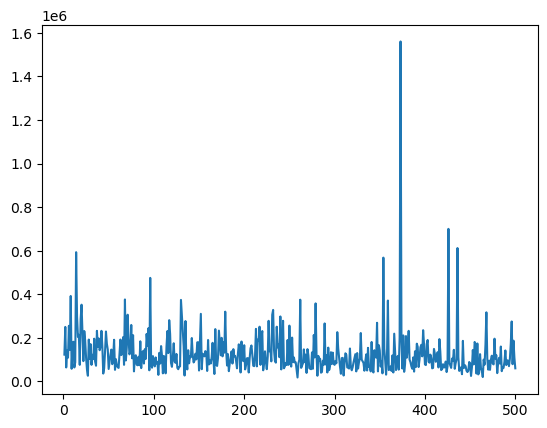

In [237]:
import matplotlib.pyplot as myplot
myplot.plot(newDataSet["Borrower Annual Income"])
            

In [243]:
newDataSet[newDataSet["Borrower Annual Income"]==1560000]

,Borrower ID Number,Wide Area Location Code,% Minority in Local Area,Median Family Income in Local Area,Borrower Annual Income,Borrower Income Ratio,"First Time Buyer? (1=Yes, 2=No)",Age of Borrower,Borrower Debt to Income Ratio,Appraised Value of Home,Amount Borrowed,LTV Ratio,Length of Mortgage in Months,Mortgage Interest Rate
373,373,6,16.56,70700,1560000,22.0651,2,55 to 64,10,465000,325000,69.56,360,3.58
